In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import statsmodels.api as sm
from statsmodels.tools.sm_exceptions import ConvergenceWarning, ValueWarning
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=ValueWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
import itertools
from pylab import rcParams

In [ ]:
df=pd.read_csv('/content/monthly-champagne-sales.csv')
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [ ]:
df.shape

(107, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 2 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Month                                                   106 non-null    object 
 1   Perrin Freres monthly champagne sales millions ?64-?72  105 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.8+ KB


In [ ]:
## Cleaning up the data
df.columns=["Month","Sales"]
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [ ]:
# Check for missing values
df.isnull().sum()

,0
Month,1
Sales,2


In [ ]:
df.tail()

,Month,Sales
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [ ]:
df.drop([105, 106], axis=0, inplace=True)
df.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [ ]:
df.isnull().sum()

,0
Month,0
Sales,0


In [ ]:
df['Month']=pd.to_datetime(df['Month'])
df.set_index('Month',inplace=True)
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [ ]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


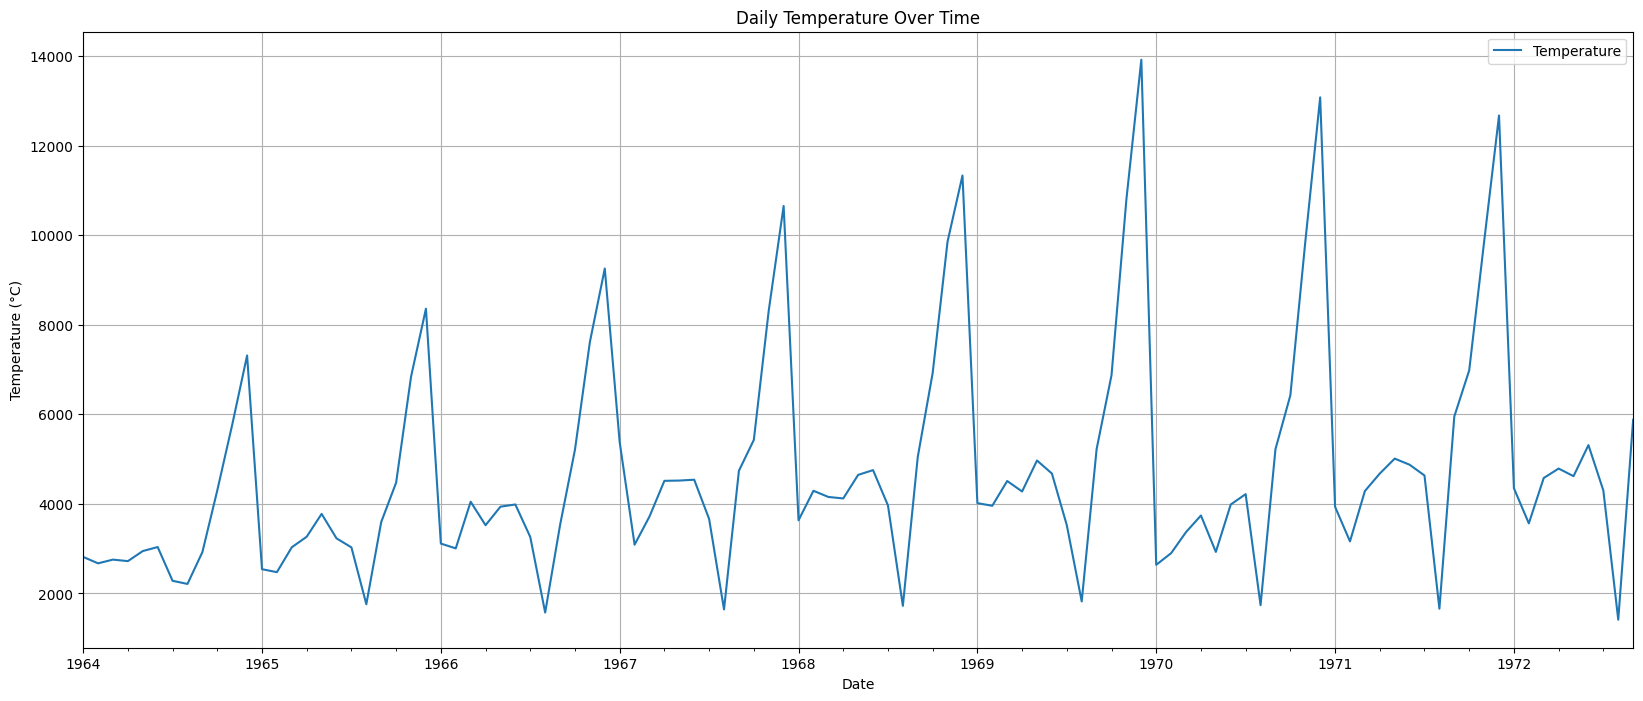

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 8
df.plot(grid=True)
plt.title('Daily Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend(['Temperature'])
plt.show()


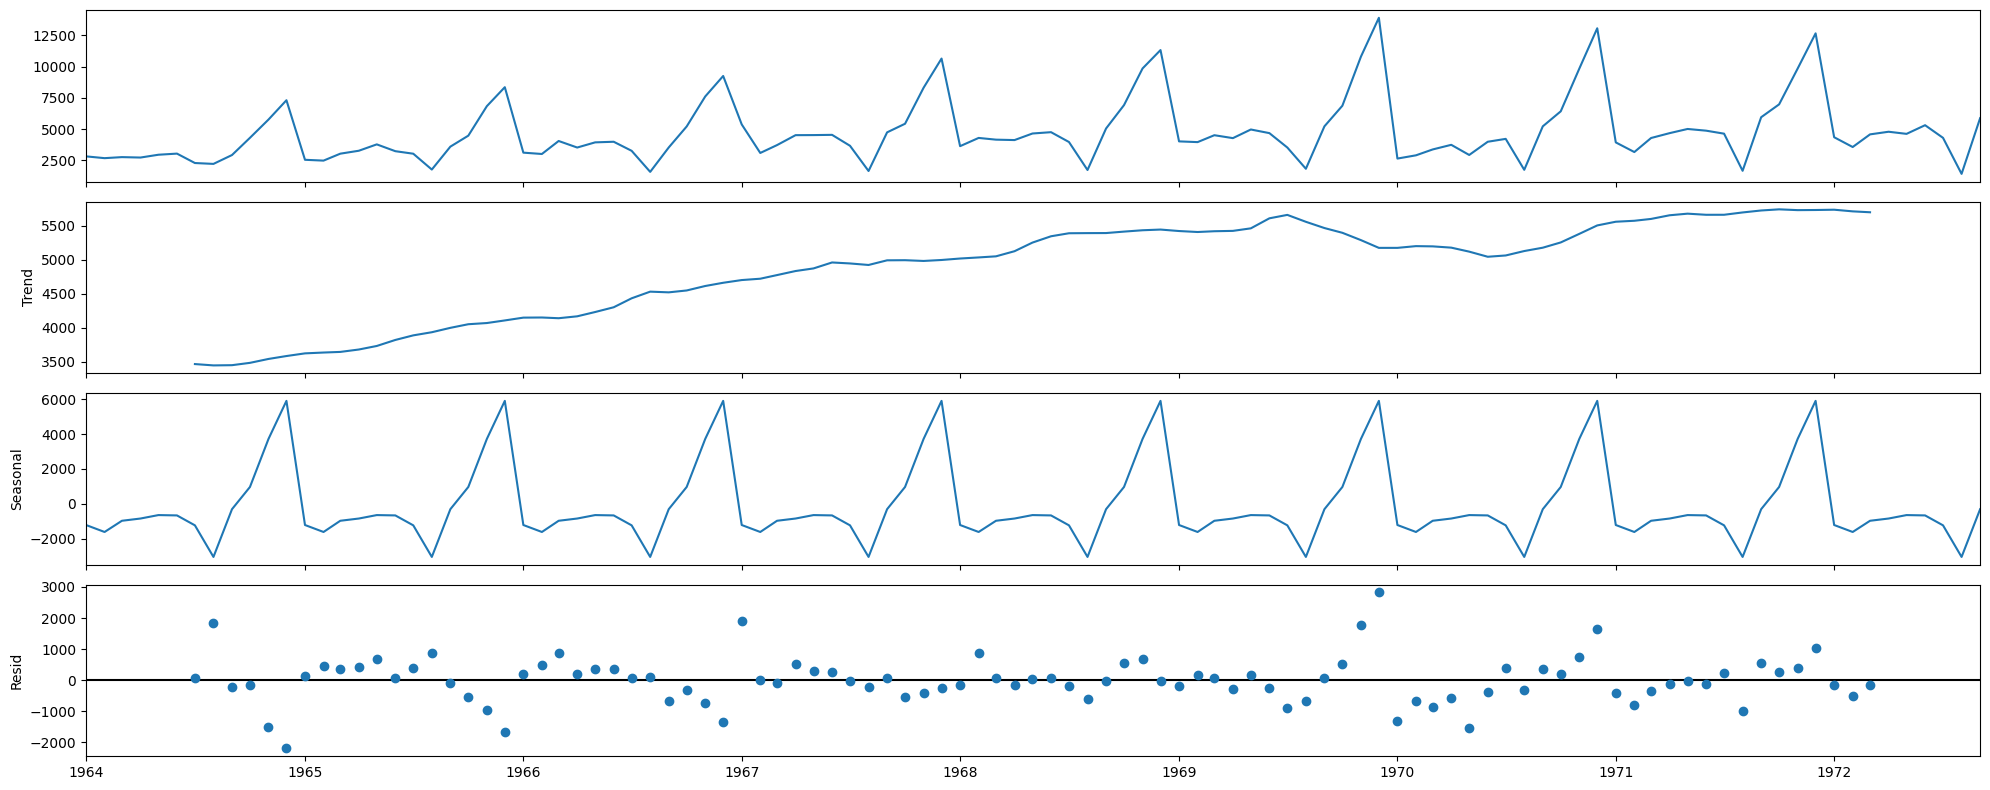

In [ ]:
decomposition_a = seasonal_decompose(df ,model='additive')
decomposition_a.plot();

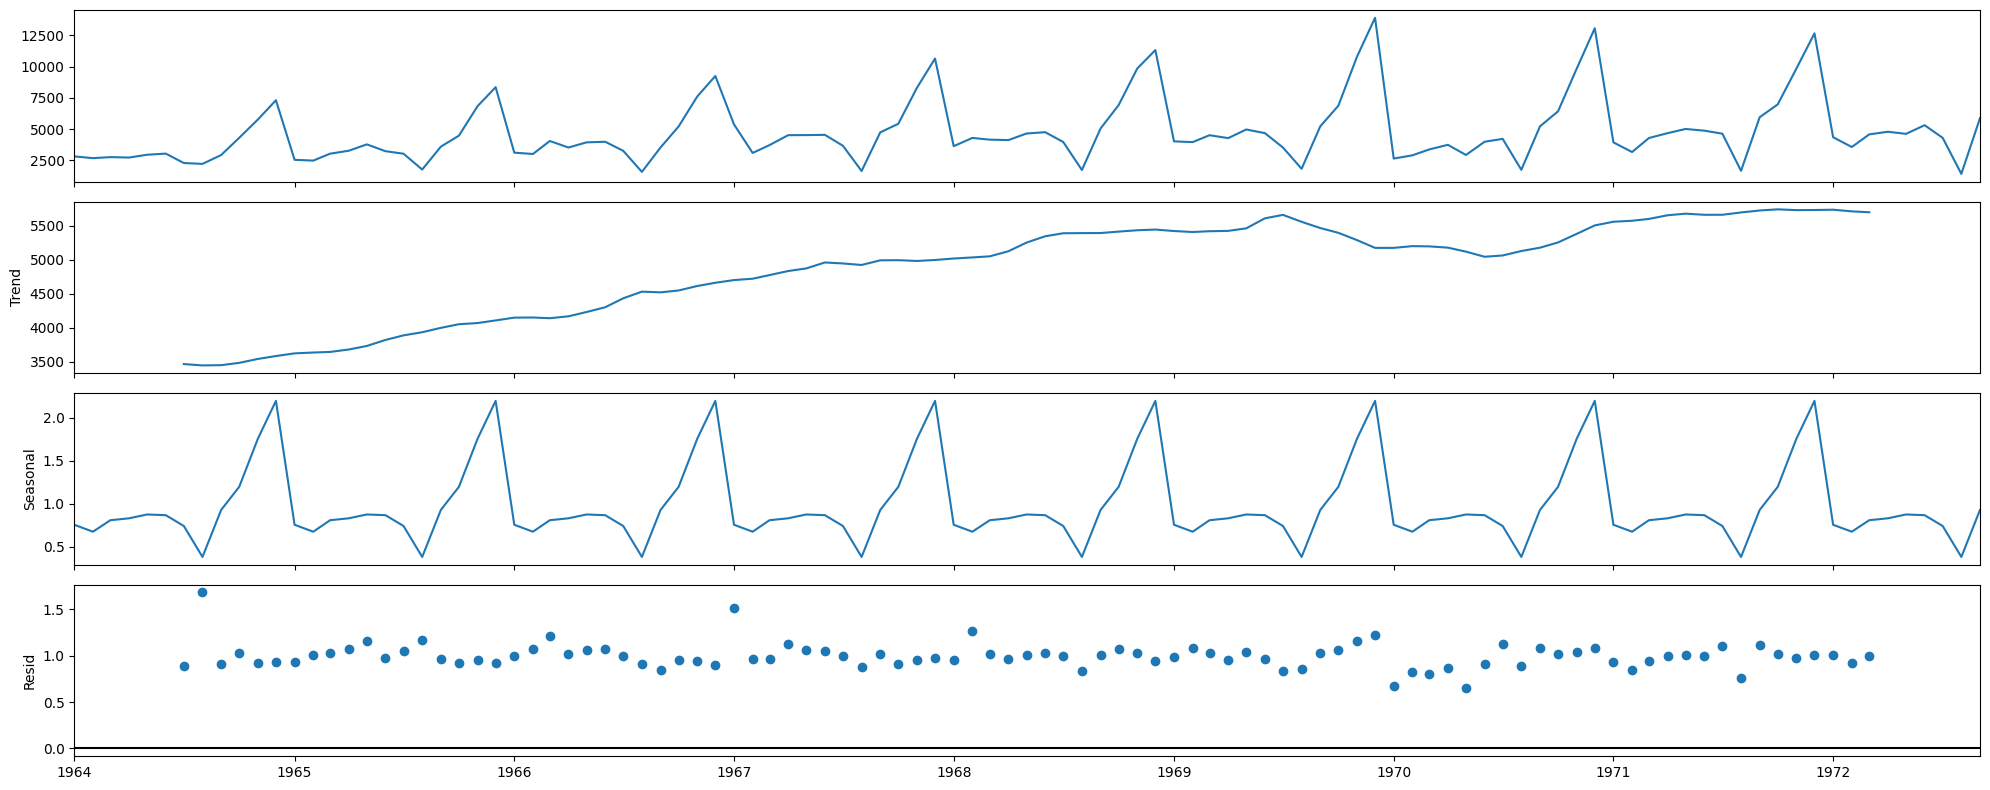

In [ ]:
decomposition_m = seasonal_decompose(df ,model='multiplicative')
decomposition_m.plot();

In [ ]:
trend = decomposition_m.trend
seasonality = decomposition_m.seasonal
residual = decomposition_m.resid

print('Trend','kjkn\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend kjkn
 Month
1964-01-01            NaN
1964-02-01            NaN
1964-03-01            NaN
1964-04-01            NaN
1964-05-01            NaN
1964-06-01            NaN
1964-07-01    3466.750000
1964-08-01    3447.125000
1964-09-01    3450.416667
1964-10-01    3484.625000
1964-11-01    3541.916667
1964-12-01    3584.583333
Name: trend, dtype: float64 

Seasonality 
 Month
1964-01-01    0.754627
1964-02-01    0.674224
1964-03-01    0.807685
1964-04-01    0.829951
1964-05-01    0.874299
1964-06-01    0.866200
1964-07-01    0.740520
1964-08-01    0.380977
1964-09-01    0.927181
1964-10-01    1.195582
1964-11-01    1.754554
1964-12-01    2.194201
Name: seasonal, dtype: float64 

Residual 
 Month
1964-01-01         NaN
1964-02-01         NaN
1964-03-01         NaN
1964-04-01         NaN
1964-05-01         NaN
1964-06-01         NaN
1964-07-01    0.888907
1964-08-01    1.684339
1964-09-01    0.913365
1964-10-01    1.032367
1964-11-01    0.927511
1964-12-01    0.929653
Name: resid, dtype

In [ ]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("The original time series is likely stationary. No need for differencing.")
    else:
        print("The original time series is likely non_stationary. Differencing is required. ")


In [ ]:
adfuller_test(df['Sales'])

ADF Test Statistic : -1.8335930563276215
p-value : 0.36391577166024586
#Lags Used : 11
Number of Observations Used : 93
The original time series is likely non_stationary. Differencing is required. 


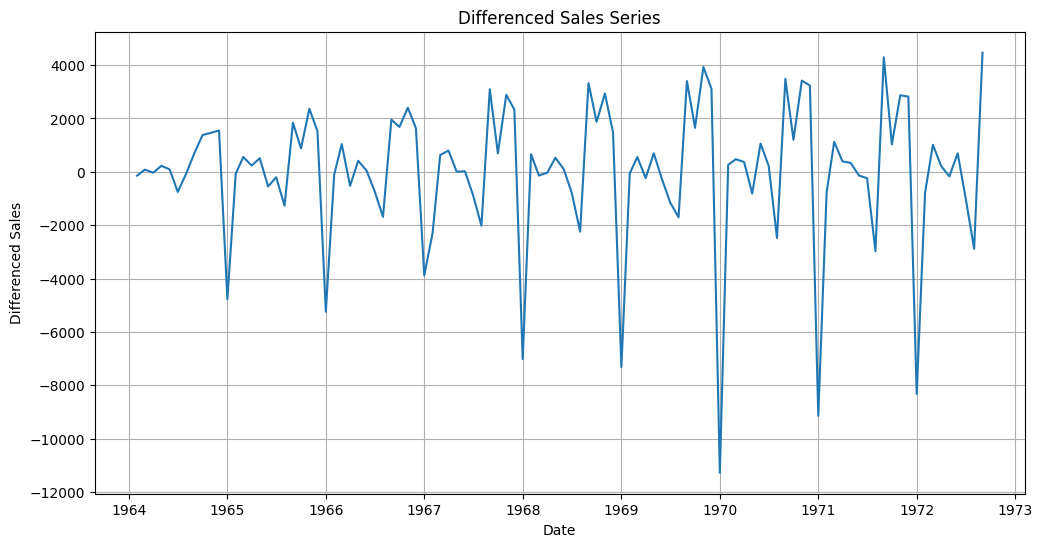

In [ ]:
df['Sales_diff1'] = df['Sales'].diff()
df.dropna(inplace=True)
# Plot the differenced series
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Sales_diff1'])
plt.title('Differenced Sales Series')
plt.xlabel('Date')
plt.ylabel('Differenced Sales')
plt.grid(True)
plt.show()

In [ ]:
adfuller_test(df['Sales_diff1'])

ADF Test Statistic : -7.189896448050999
p-value : 2.519620447387081e-10
#Lags Used : 11
Number of Observations Used : 92
The original time series is likely stationary. No need for differencing.


In [ ]:
seasonal_period = 12
df['Seasonal_diff1'] = df['Sales'].diff(seasonal_period)
df.dropna(inplace=True)


In [ ]:
df.head(15)

,Sales,Sales_diff1,Seasonal_diff1
Month,,,
1965-02-01,2475.0,-66.0,-197.0
1965-03-01,3031.0,556.0,276.0
1965-04-01,3266.0,235.0,545.0
1965-05-01,3776.0,510.0,830.0
1965-06-01,3230.0,-546.0,194.0
1965-07-01,3028.0,-202.0,746.0
1965-08-01,1759.0,-1269.0,-453.0
1965-09-01,3595.0,1836.0,673.0
1965-10-01,4474.0,879.0,173.0


In [ ]:
adfuller_test(df['Seasonal_diff1'].dropna())

ADF Test Statistic : -7.609683942589262
p-value : 2.2725535600890137e-11
#Lags Used : 0
Number of Observations Used : 91
The original time series is likely stationary. No need for differencing.


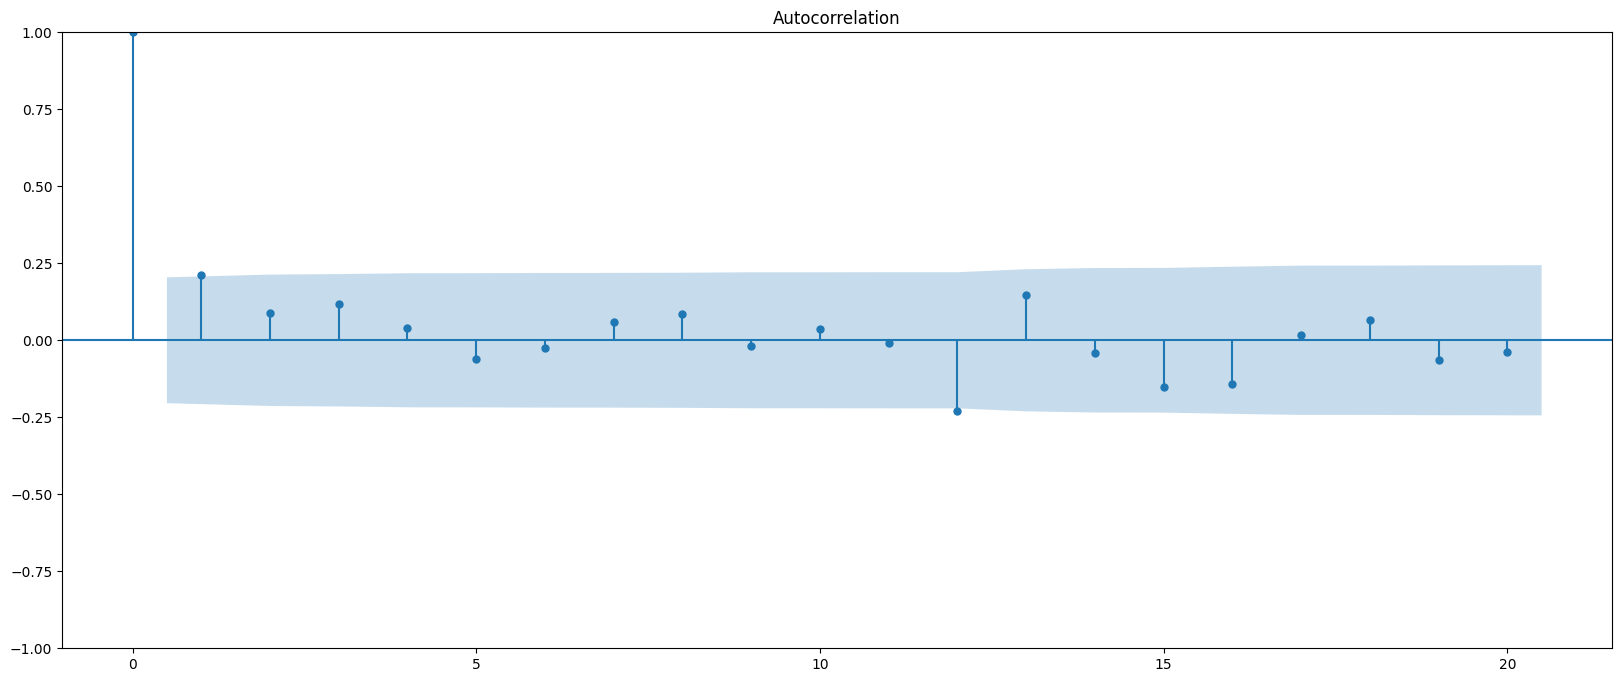

In [ ]:
plot_acf(df['Seasonal_diff1'],alpha=0.05);

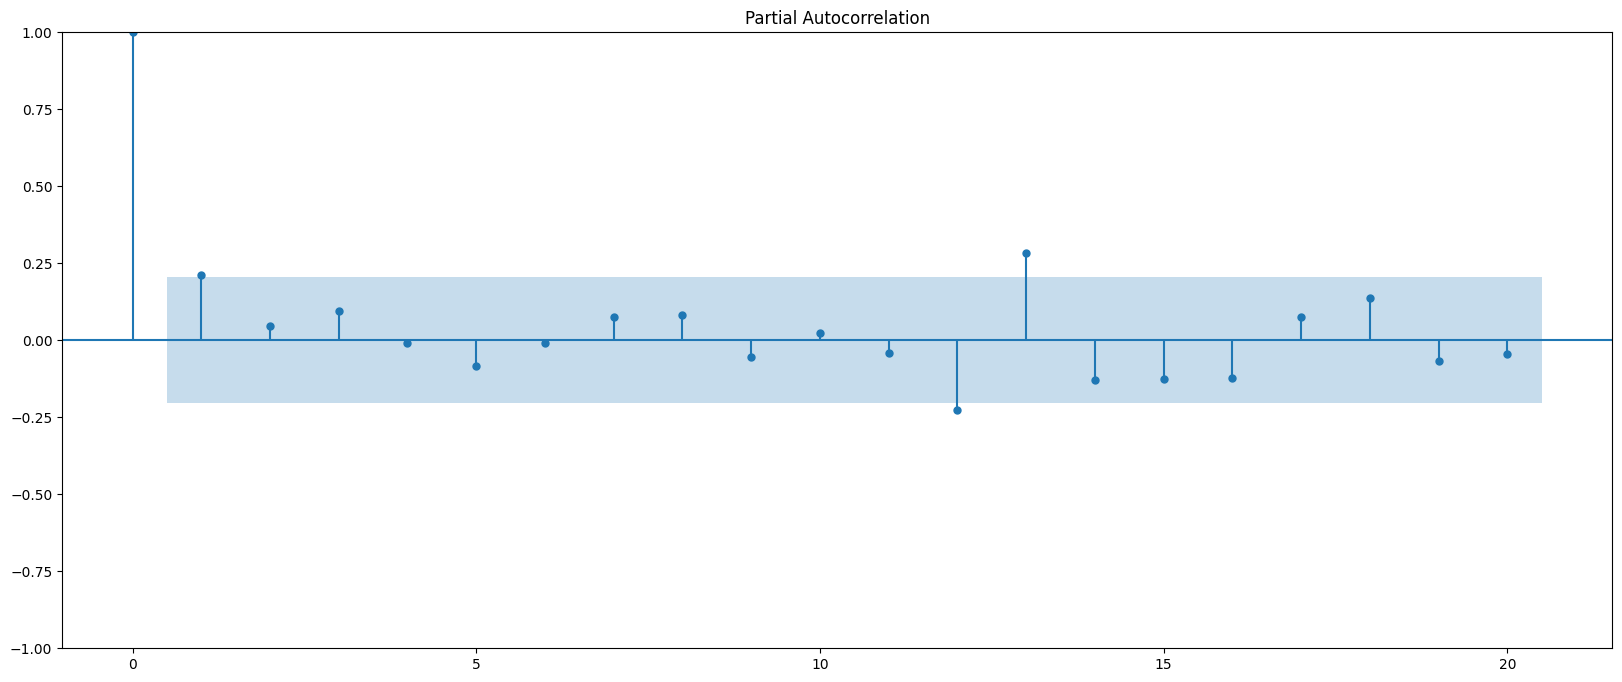

In [ ]:
plot_pacf(df['Seasonal_diff1'],alpha=0.05);

#ARIMA Model
**Theory:** Extends ARMA by adding differencing to make the time series stationary. It combines autoregression, differencing, and moving average components.

**Equation:**

$$
\Delta^d X_t = c + \phi_1 \Delta^d X_{t-1} + \cdots + \phi_p \Delta^d X_{t-p} + \epsilon_t + \theta_1 \epsilon_{t-1} + \cdots + \theta_q \epsilon_{t-q}
$$

**Parameters:**

- **$d$**: Degree of differencing  
- **$\phi$**: AR coefficients  
- **$\theta$**: MA coefficients  
- **$p$**: AR order  
- **$q$**: MA order


In [ ]:
model=ARIMA(df['Seasonal_diff1'],order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         Seasonal_diff1   No. Observations:                   92
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -732.686
Date:                Mon, 12 Aug 2024   AIC                           1471.372
Time:                        04:17:14   BIC                           1478.905
Sample:                    02-01-1965   HQIC                          1474.411
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1984      0.079      2.499      0.012       0.043       0.354
ma.L1         -0.9650      0.034    -28.174      0.000      -1.032      -0.898
sigma2      5.642e+05   6.25e+04      9.031      0.000    4.42e+05    6.87e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                13.45
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               1.73   Skew:                            -0.23
Prob(H) (two-sided):                  0.14   Kurtosis:                         4.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Month'>

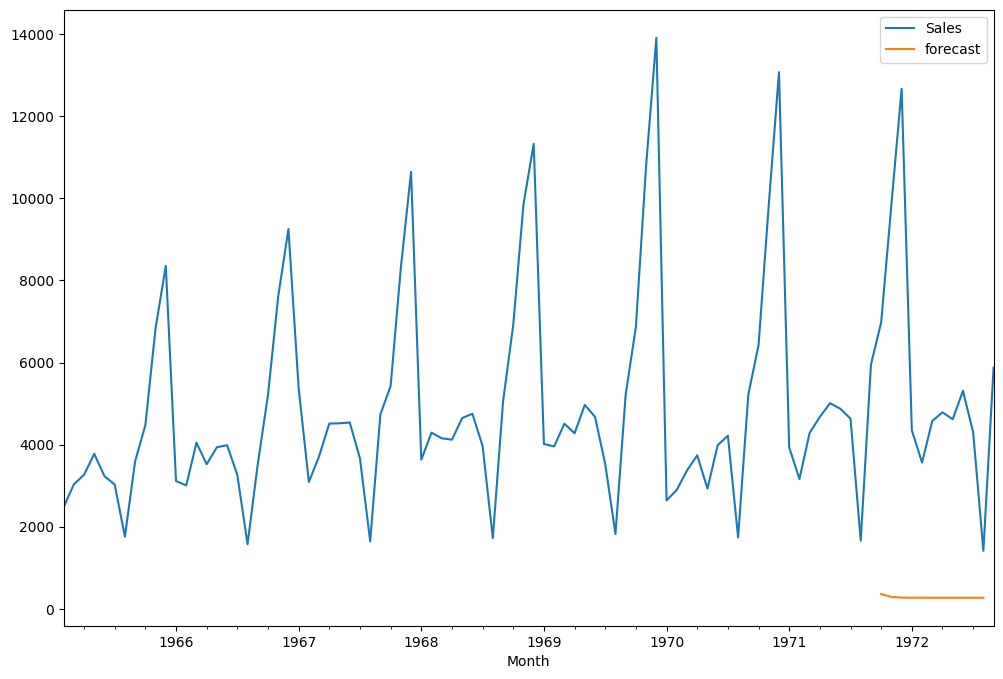

In [ ]:

df['forecast']=model_fit.predict(start=80,end=90,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [ ]:
df

,Sales,Sales_diff1,Seasonal_diff1,forecast
Month,,,,
1965-02-01,2475.0,-66.0,-197.0,NaN
1965-03-01,3031.0,556.0,276.0,NaN
1965-04-01,3266.0,235.0,545.0,NaN
1965-05-01,3776.0,510.0,830.0,NaN
1965-06-01,3230.0,-546.0,194.0,NaN
...,...,...,...,...
1972-05-01,4618.0,-170.0,-392.0,269.318115
1972-06-01,5312.0,694.0,438.0,269.317227
1972-07-01,4298.0,-1014.0,-335.0,269.317050


# SARIMA Model
**Theory:** Adds seasonal components to the ARIMA model. It accounts for seasonality in addition to trends and cycles.

**Equation:**

**Equation:**

$$
\Phi_p(B_s) \Phi_d(B) \Delta^d X_t = \Theta_q(B_s) \Theta(B) \epsilon_t
$$


**Parameters:**

- **$p$**: Seasonal autoregressive order  
- **$q$**: Seasonal moving average order  
- **$d$**: Differencing order  
- **$\Phi_p(B_s)$**: Seasonal AR polynomial of order $p$  
- **$\Theta_q(B_s)$**: Seasonal MA polynomial of order $q$  
- **$\Phi_d(B)$**: Non-seasonal AR polynomial  
- **$\Theta(B)$**: Non-seasonal MA polynomial  
- **$X_t$**: Time series value at time $t$  
- **$\epsilon_t$**: White noise error term


In [ ]:
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

<Axes: xlabel='Month'>

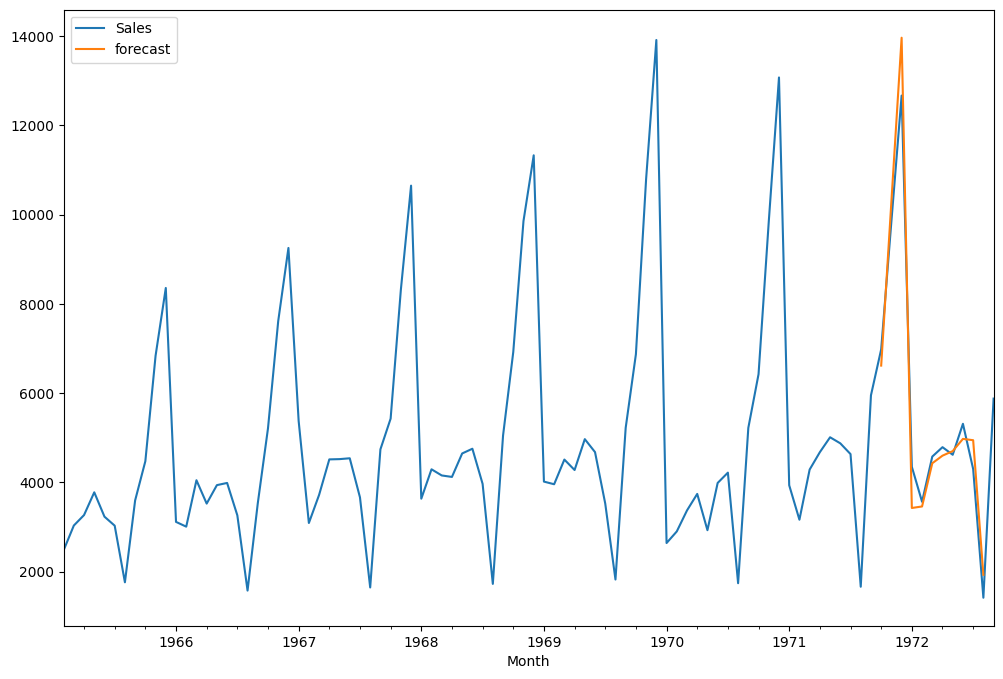

In [ ]:
df['forecast']=results.predict(start=80,end=90,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [ ]:
from pandas.tseries.offsets import DateOffset

<Axes: >

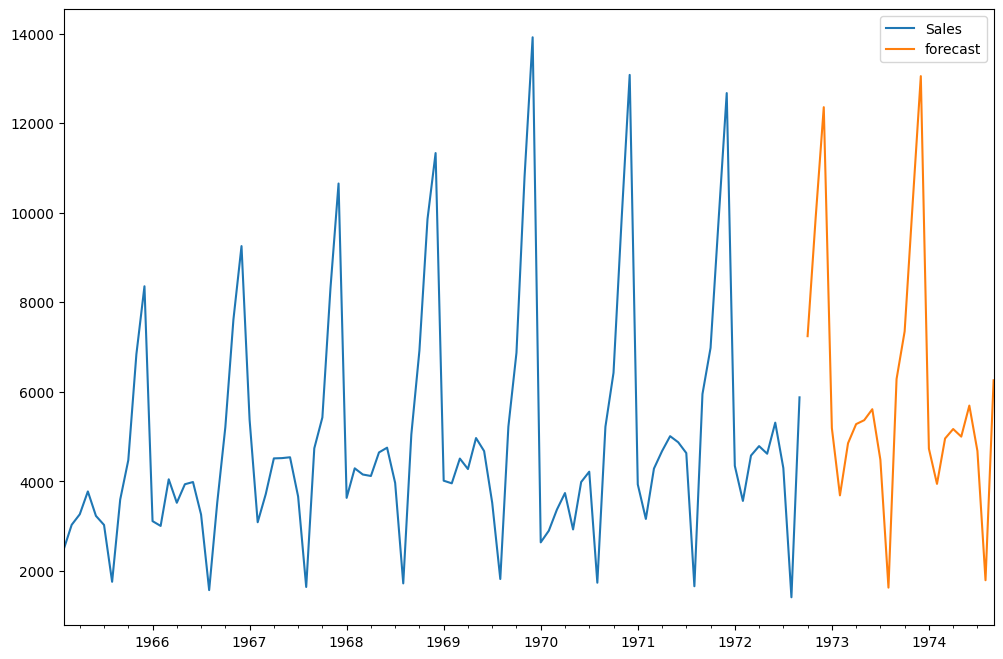

In [ ]:
# Define the range of future dates
future_dates = [df.index[-1] + DateOffset(months=x) for x in range(1, 25)]
future_dates_df = pd.DataFrame(index=future_dates, columns=df.columns)

# Concatenate original data with future dates DataFrame
future_df = pd.concat([df, future_dates_df])

# Ensure the range is correctly set for the new dates in future_df
start = len(df)  # Starting index for the future dates
end = start + len(future_dates) - 1  # Ending index for the forecast

# Update this line to reflect correct prediction range
future_df['forecast'] = results.predict(start=start, end=end, dynamic=True)

# Plot the results
future_df[['Sales', 'forecast']].plot(figsize=(12, 8))

In [ ]:
future_df['forecast'].tail()

,forecast
1974-05-01,5000.007177
1974-06-01,5692.977019
1974-07-01,4678.712145
1974-08-01,1793.783641
1974-09-01,6258.225934
